<a href="https://colab.research.google.com/github/Sneha795/ML_LAB/blob/main/binary_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [4]:
mask = (y == 0) | (y == 1)
X_binary = X[mask]
y_binary = y[mask]

In [5]:
X_binary = X_binary.reshape(X_binary.shape[0], -1) / 255.0

In [6]:
num_zeros = np.sum(y_binary == 0)
num_ones = np.sum(y_binary == 1)
print(f"Number of 0s: {num_zeros}")
print(f"Number of 1s: {num_ones}")

Number of 0s: 6903
Number of 1s: 7877


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [10]:
print(f"\nAccuracy: {acc:.4f}")
print("Confusion Matrix:\n", cm)


Accuracy: 0.9997
Confusion Matrix:
 [[1401    1]
 [   0 1554]]


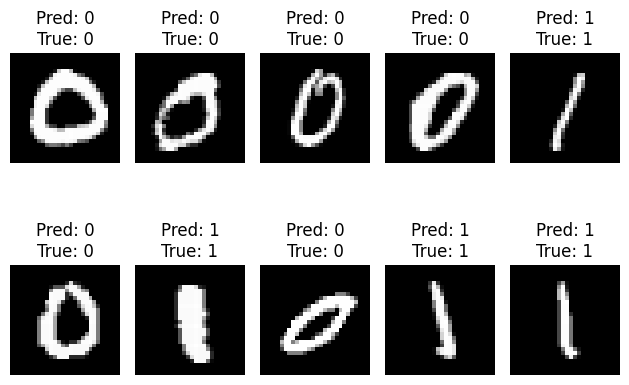

In [11]:
import matplotlib.pyplot as plt

# Pick 10 random test samples
indices = np.random.choice(len(X_test), 10, replace=False)

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}\nTrue: {y_test[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
